In [1]:
import vectorbt as vbt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [18]:
ticker      = 'BTCUSDT'
start_date  = '2022-09-01'
end_date    = '2022-12-31'
interval    = '5m'
data        = vbt.BinanceData.download(ticker, interval=interval, start=start_date, end=end_date).get()
data.head(10)

/home/serg/miniconda3/envs/tf/lib/python3.10/site-packages/dateparser/date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html



0it [00:00, ?it/s]

,Open,High,Low,Close,Volume,Close time,Quote volume,Number of trades,Taker base volume,Taker quote volume
Open time,,,,,,,,,,
2022-08-31 22:00:00+00:00,20280.54,20292.44,20222.03,20292.44,981.29484,2022-08-31 22:04:59.999000+00:00,1.987250e+07,17144,610.94978,1.237133e+07
2022-08-31 22:05:00+00:00,20292.44,20292.75,20242.37,20246.89,919.69325,2022-08-31 22:09:59.999000+00:00,1.863690e+07,18205,449.37087,9.106546e+06
2022-08-31 22:10:00+00:00,20246.89,20253.38,20135.92,20154.27,961.21643,2022-08-31 22:14:59.999000+00:00,1.940243e+07,21023,397.94718,8.031984e+06
2022-08-31 22:15:00+00:00,20155.43,20172.57,20095.84,20125.12,1432.64173,2022-08-31 22:19:59.999000+00:00,2.884356e+07,32571,686.41614,1.382109e+07
2022-08-31 22:20:00+00:00,20126.82,20160.39,20122.08,20140.36,855.22373,2022-08-31 22:24:59.999000+00:00,1.722826e+07,17376,440.82034,8.880359e+06
2022-08-31 22:25:00+00:00,20140.36,20149.73,20105.75,20115.62,807.67980,2022-08-31 22:29:59.999000+00:00,1.625241e+07,17396,383.07045,7.708498e+06
2022-08-31 22:30:00+00:00,20114.57,20131.22,20085.70,20113.62,886.36534,2022-08-31 22:34:59.999000+00:00,1.782283e+07,19458,420.36542,8.452921e+06
2022-08-31 22:35:00+00:00,20112.82,20126.37,20088.61,20095.68,671.18843,2022-08-31 22:39:59.999000+00:00,1.349649e+07,14865,343.81677,6.913933e+06
2022-08-31 22:40:00+00:00,20094.33,20118.63,20086.39,20115.17,613.85862,2022-08-31 22:44:59.999000+00:00,1.234026e+07,14408,333.57482,6.706078e+06


In [19]:
# create technical indicators
dataset                     = data.copy()
dataset['atr']              = vbt.ATR.run(close=dataset['Close'], high=dataset['High'], low=dataset['Low'], window=24).atr
dataset['rsi']              = vbt.RSI.run(close=dataset['Close'], window=14).rsi
dataset['macd']             = vbt.MACD.run(close=dataset['Close'], fast_window=12, slow_window=26, signal_window=9).macd
dataset['obv']              = vbt.OBV.run(close=dataset['Close'], volume=dataset['Volume']).obv
dataset['stoch']            = vbt.STOCH.run(high=dataset['High'], low=dataset['Low'], close=dataset['Close']).percent_k
dataset['stoch_signal']     = vbt.STOCH.run(high=dataset['High'], low=dataset['Low'], close=dataset['Close']).percent_d
dataset['mstd']             = vbt.MSTD.run(close=dataset['Close'], window=20).mstd
dataset['bbands_upper']     = vbt.BBANDS.run(close=dataset['Close'], window=20).upper
dataset['bbands_middle']    = vbt.BBANDS.run(close=dataset['Close'], window=20).middle
dataset['bbands_lower']     = vbt.BBANDS.run(close=dataset['Close'], window=20).lower

dataset.dropna(inplace=True)
dataset.tail(10)

,Open,High,Low,Close,Volume,Close time,Quote volume,Number of trades,Taker base volume,Taker quote volume,atr,rsi,macd,obv,stoch,stoch_signal,mstd,bbands_upper,bbands_middle,bbands_lower
Open time,,,,,,,,,,,,,,,,,,,,
2022-12-30 21:10:00+00:00,16614.24,16617.36,16601.40,16605.92,596.41631,2022-12-30 21:14:59.999000+00:00,9.905618e+06,14409,287.99950,4.783275e+06,20.314822,78.896744,7.625577,21379.784595,51.582729,55.590133,24.853860,16605.337219,16555.6295,16505.921781
2022-12-30 21:15:00+00:00,16606.55,16612.64,16586.68,16591.85,731.22681,2022-12-30 21:19:59.999000+00:00,1.213699e+07,15669,373.27633,6.195823e+06,20.766436,70.931264,9.448269,20648.557785,40.777170,50.503352,26.068031,16609.665561,16557.5295,16505.393439
2022-12-30 21:20:00+00:00,16592.65,16599.11,16586.81,16595.95,373.40323,2022-12-30 21:24:59.999000+00:00,6.196035e+06,11939,197.78226,3.281949e+06,20.089121,69.706539,12.209615,21021.961015,43.029115,45.129671,27.376676,16614.241851,16559.4885,16504.735149
2022-12-30 21:25:00+00:00,16595.95,16612.62,16595.06,16606.47,427.83469,2022-12-30 21:29:59.999000+00:00,7.103432e+06,12909,224.68761,3.730660e+06,19.886792,70.334892,15.846154,21449.795705,50.391937,44.732741,29.054157,16620.539315,16562.4310,16504.322685
2022-12-30 21:30:00+00:00,16605.85,16608.11,16593.50,16597.40,363.58316,2022-12-30 21:34:59.999000+00:00,6.035978e+06,10552,151.43990,2.514124e+06,19.464648,69.892070,19.507244,21086.212545,44.043953,45.821669,29.841322,16624.530644,16564.8480,16505.165356
2022-12-30 21:35:00+00:00,16597.66,16610.90,16596.30,16604.05,462.94778,2022-12-30 21:39:59.999000+00:00,7.687180e+06,11878,267.19405,4.436744e+06,19.075476,74.686005,22.910833,21549.160325,48.698208,47.711366,29.562518,16627.907035,16568.7820,16509.656965
2022-12-30 21:40:00+00:00,16605.22,16615.00,16603.31,16611.23,370.41571,2022-12-30 21:44:59.999000+00:00,6.151895e+06,10661,198.98108,3.304755e+06,18.484638,76.859030,26.603846,21919.576035,53.723404,48.821855,29.912472,16632.387443,16572.5625,16512.737557
2022-12-30 21:45:00+00:00,16611.23,16614.55,16604.00,16605.97,205.46095,2022-12-30 21:49:59.999000+00:00,3.412380e+06,8855,86.94367,1.444017e+06,17.849867,72.675605,29.694231,21714.115085,48.558662,50.326758,29.466610,16635.033720,16576.1005,16517.167280
2022-12-30 21:50:00+00:00,16605.62,16606.68,16591.81,16592.42,342.51000,2022-12-30 21:54:59.999000+00:00,5.685185e+06,11339,153.36752,2.545707e+06,17.611478,66.298857,30.860577,21371.605085,37.339531,46.540532,28.755432,16635.993364,16578.4825,16520.971636


In [20]:
# create target column
dataset['target']           = np.where(dataset['Close'].shift(-1) > dataset['Close'], 1, 0)
features                    = ['atr', 'rsi', 'macd', 'obv', 'Taker quote volume', 'Number of trades', 'Volume', 'stoch', 'stoch_signal', 'mstd', 'bbands_upper', 'bbands_middle', 'bbands_lower']
X                           = dataset[features]
y                           = dataset['target']

# split data to train, validation and test
train_size                  = int(len(dataset) * 0.8)
validation_size             = int(len(dataset) * 0.1)
test_size                   = len(dataset) - train_size - validation_size

X_train, X_validation, X_test = (
    X.iloc[:train_size],
    X.iloc[train_size : train_size + validation_size],
    X.iloc[train_size + validation_size :],
)
y_train, y_validation, y_test = (
    y.iloc[:train_size],
    y.iloc[train_size : train_size + validation_size],
    y.iloc[train_size + validation_size :],
)


In [21]:
# create and train model
model                       = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
model.fit(X_train, y_train)

# predict
y_pred                      = model.predict(X_validation)

# calculate accuracy
accuracy                    = model.score(X_validation, y_validation)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 53.56


In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 792 candidates, totalling 2376 fits
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   2.6s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   5.4s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   5.4s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   5.5s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   8.3s
[CV] 

KeyboardInterrupt: 

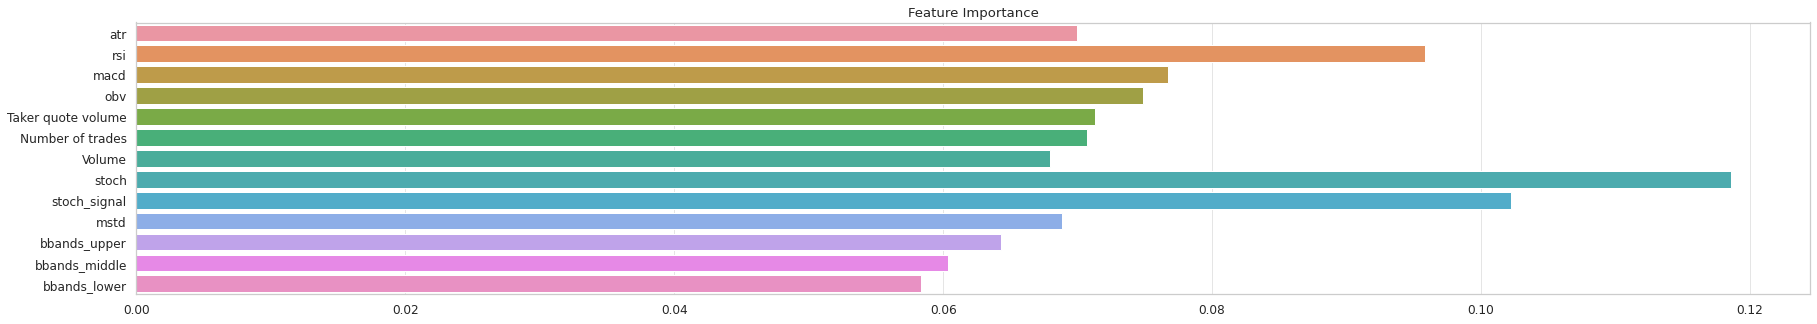

In [23]:
# plot results feature importance
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.figure(figsize=(30, 5))
sns.barplot(x=model.feature_importances_, y=features)
plt.title('Feature Importance')
plt.show()  


[Text(0.55242291320598, 0.9545454545454546, 'stoch <= 58.761\ngini = 0.5\nsamples = 17641\nvalue = [13859, 13999]\nclass = 1'),
 Text(0.28714181893687707, 0.8636363636363636, 'atr <= 29.209\ngini = 0.497\nsamples = 10565\nvalue = [7741, 8920]\nclass = 1'),
 Text(0.09390573089700997, 0.7727272727272727, 'mstd <= 5.603\ngini = 0.495\nsamples = 4078\nvalue = [2835, 3476]\nclass = 1'),
 Text(0.012458471760797342, 0.6818181818181818, 'obv <= -20937.103\ngini = 0.472\nsamples = 111\nvalue = [102, 63]\nclass = 0'),
 Text(0.0049833887043189366, 0.5909090909090909, 'bbands_lower <= 16620.901\ngini = 0.142\nsamples = 10\nvalue = [1, 12]\nclass = 1'),
 Text(0.0033222591362126247, 0.5, 'bbands_lower <= 16618.862\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.0016611295681063123, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.0049833887043189366, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.006644518272425249,

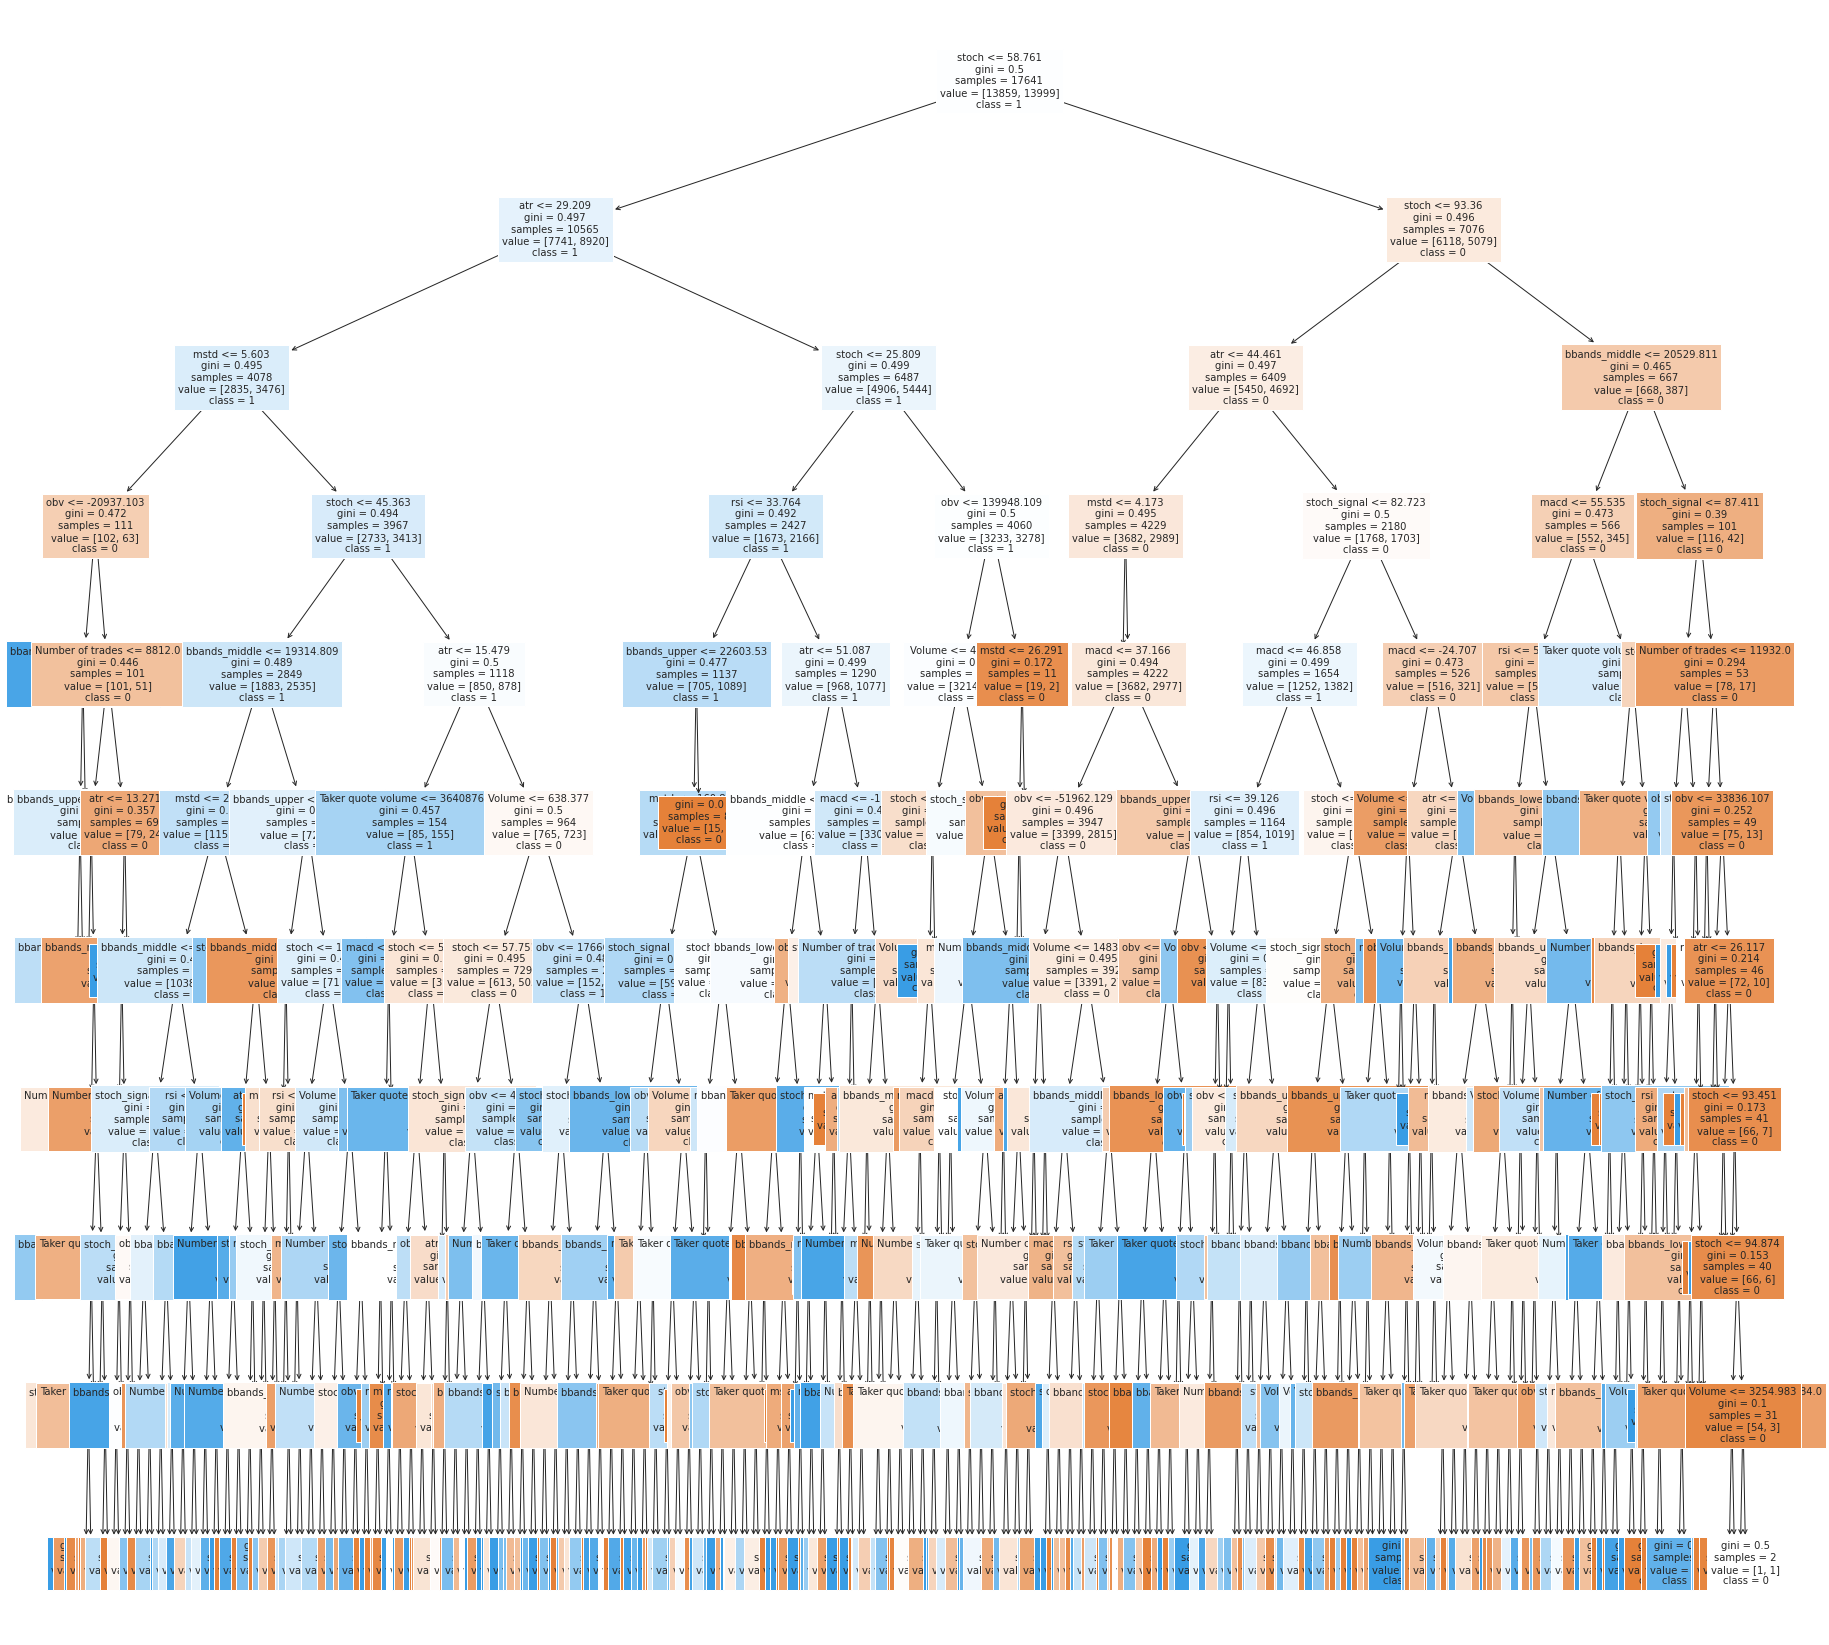

In [24]:
# plot tree
from sklearn import tree
plt.figure(figsize=(30, 30))
tree.plot_tree(model.estimators_[1], feature_names=features, class_names=['0', '1'], filled=True, fontsize=10)

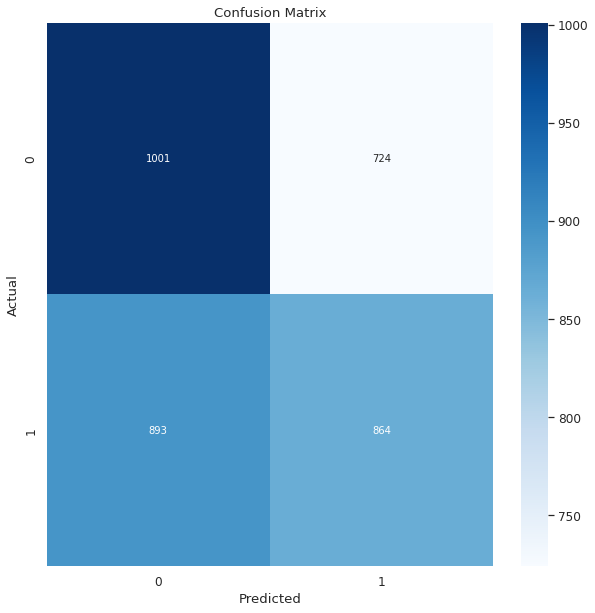

In [25]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
cm = confusion_matrix(y_validation, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [26]:
# # plot ROC curve
# from sklearn.metrics import roc_curve, auc
# fpr, tpr, thresholds = roc_curve(y_validation, y_pred)
# roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(10, 10))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.show()


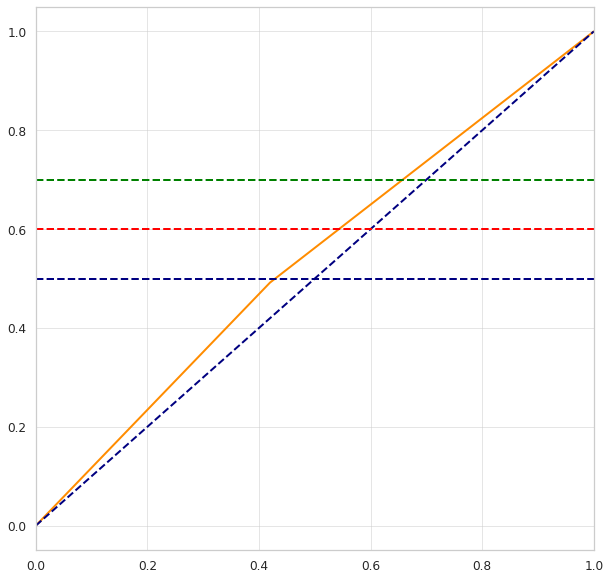

In [27]:
# improve ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_validation, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])

# plot 50% line
plt.plot([0, 1], [0.5, 0.5], color='navy', lw=2, linestyle='--')

# plot 60% line
plt.plot([0, 1], [0.6, 0.6], color='red', lw=2, linestyle='--')

# plot 70% line

plt.plot([0, 1], [0.7, 0.7], color='green', lw=2, linestyle='--')


Text(0, 0.5, 'Frequency')

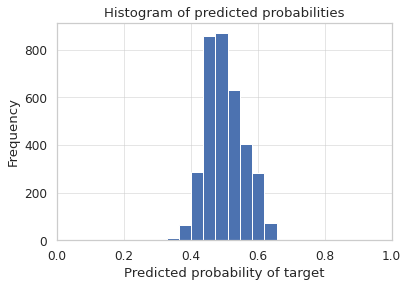

In [28]:
# predict probabilities and plot
y_pred_prob = model.predict_proba(X_validation)[:, 1]
plt.hist(y_pred_prob, bins=10)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of target')
plt.ylabel('Frequency')


In [29]:
# # threshold at 0.6
# y_pred_prob = model.predict_proba(X_validation)[:, 1]
# y_pred_new = np.where(y_pred_prob > 0.54, 1, 0)
# # print accuracy
# accuracy = model.score(X_validation, y_pred_new)
# print('Accuracy: %.2f' % (accuracy * 100))
# cm = confusion_matrix(y_validation, y_pred_new)
# plt.figure(figsize=(10, 10))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()


In [30]:
# define function to calculate profit
def calculate_profit(y_test, y_pred):
    profit = 0
    for i in range(len(y_test)):
        if y_test[i] == 1 and y_pred[i] == 1:
            profit += 100
        elif y_test[i] == 0 and y_pred[i] == 1:
            profit -= 100
    return profit

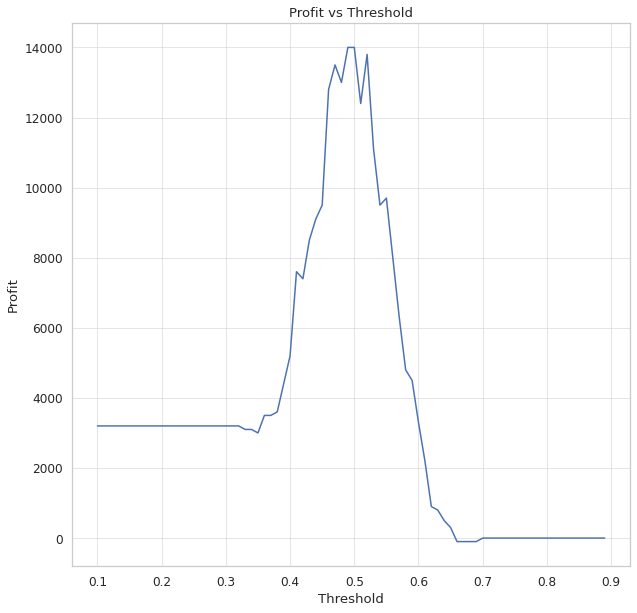

Best Threshold: 0.49
Best Profit: 14000.00


In [31]:
# find best threshold
thresholds = np.arange(0.1, 0.9, 0.01)
profits = []
for threshold in thresholds:
    y_pred_new = np.where(y_pred_prob > threshold, 1, 0)
    profit = calculate_profit(y_validation, y_pred_new)
    profits.append(profit)
plt.figure(figsize=(10, 10))
plt.plot(thresholds, profits)
plt.title('Profit vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Profit')
plt.show()

# print the best threshold and profit
best_threshold = thresholds[profits.index(max(profits))]
print('Best Threshold: %.2f' % best_threshold)
print('Best Profit: %.2f' % max(profits))


In [34]:
# test strategy using vectobt on test data
import vectorbt as vbt

y_pred_prob         = model.predict_proba(X_test)[:, 1]
y_pred_new          = np.where(y_pred_prob > best_threshold, 1, 0)
print('Accuracy: %.2f' % (model.score(X_test, y_pred_new) * 100))


test_data           = pd.DataFrame(y_pred_new, index=y_test.index, columns=['target'])
test_data['close']  = dataset['Close']

entries = np.where(test_data['target'] == 1, True, False)
exits   = np.where(test_data['target'] == 0, True, False)

portfolio = vbt.Portfolio.from_signals(
    close           =test_data['close'],
    entries         =entries,
    exits           =exits,
    short_entries   =exits,
    short_exits     =entries,
)
portfolio.plot().show()
portfolio.stats()

Accuracy: 93.17


Start                         2022-12-18 19:45:00+00:00
End                           2022-12-30 21:55:00+00:00
Period                                 12 days 02:15:00
Start Value                                       100.0
End Value                                    108.032524
Total Return [%]                               8.032524
Benchmark Return [%]                            -0.9232
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                               2.721431
Max Drawdown Duration                   4 days 18:55:00
Total Trades                                        731
Total Closed Trades                                 730
Total Open Trades                                     1
Open Trade PnL                                -0.047942
Win Rate [%]                                  65.479452
Best Trade [%]                                 0.812848
Worst Trade [%]                               -1

In [246]:
y_pred_prob == y_pred_new

array([False, False, False, ..., False, False, False])